
#  **Day 4: Decision Trees**

##  **1. What Are Decision Trees?**

Decision Trees are models that make predictions by repeatedly splitting the data into smaller, more homogeneous groups. They are easy to visualize, interpret, and can handle both classification and regression tasks.

---

##  **2. Splitting Criteria (Gini & Entropy)**

### **Gini Impurity**

* Measures how impure a node is.
* Lower values mean purer splits.
* Faster to compute, commonly used in CART (scikit-learn default).

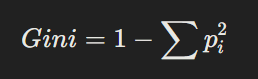


### **Entropy (Information Gain)**

* Measures uncertainty or randomness in a node.
* Higher Information Gain means better split.

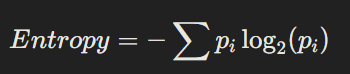

**Information Gain = Entropy(before split) − Entropy(after split)**

---

##  **3. Overfitting in Decision Trees**

Decision Trees tend to grow very deep, memorizing the training data.
Symptoms of overfitting:

* Very high training accuracy
* Much lower testing accuracy
* Deep and complex tree with too many branches

Why it happens:

* Trees keep splitting until leaf nodes are pure
* They capture noise, outliers, and random patterns

---

##  **4. Pruning (Fix for Overfitting)**

### **Pre-Pruning (Early Stopping)**

Limit the growth of the tree by setting:

* `max_depth`
* `min_samples_split`
* `min_samples_leaf`
* `max_leaf_nodes`

Pre-pruning stops the tree before it overfits.

---

### **Post-Pruning (Cost Complexity Pruning)**

Grow a full tree, then cut unnecessary branches.

Uses **ccp_alpha**:

* Higher `ccp_alpha` → more pruning
* Removes splits that add very little improvement
* Results in a simpler, generalised tree

---

##  **5. Why Decision Trees Overfit Easily**

* They split until every sample becomes perfectly classified
* Sensitive to noise and outliers
* Tend to create overly specific branches
* High variance model (small data changes → different tree)

---

##  **6. Key Takeaways**

* Use **Gini** or **Entropy** to decide the best split.
* Decision Trees can easily overfit; pruning is essential.
* Limit depth and minimum samples to build a stable, generalised model.
* Trees are interpretable but unstable—this is why ensembles like Random Forest work better.

---


In [9]:
import pandas as pd
df=pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [10]:
inputs=df.drop('salary_more_then_100k',axis=1)
target=df['salary_more_then_100k']

In [11]:
from sklearn.preprocessing import LabelEncoder

cols=['company','job','degree']
encoder=LabelEncoder()
for i in cols:
    inputs[i]=encoder.fit_transform(inputs[i])

In [12]:
from sklearn import tree

model=tree.DecisionTreeClassifier()

In [13]:
model.fit(inputs,target)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
model.predict([[2,1,0]])

d:\DataScience-Learning-Roadmap\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [15]:
model.score(inputs,target)

1.0